# Searching - Measuring Operations

In this notebook we will look at a number of different searching strategies.

In [38]:
# Import the random package
import random
import time
import math 

Read in a list of common names in the United States and the percentage of the population with those names

In [46]:
# Create an empty list of names
names = list()

# Iterate through each name in the file and add it to the list 
# (file contains name and percentage of use in US sepearted by commas)
# The "U" passed to open handles different new line characters on Mac, Windows etc
for line in open("names.csv"):
    # Split each line int ot the name and percentage tokens
    token = line.split(",")
    # add the name and perceantege the names list as a dictionary object
    names.append({"name":token[0], "percentage":float(token[1].strip())})

In [47]:
len(names)

5163

In [57]:
names[-100:]

[{'name': 'WILTON', 'percentage': 0.004},
 {'name': 'WINDY', 'percentage': 0.002},
 {'name': 'WINFORD', 'percentage': 0.002},
 {'name': 'WINFRED', 'percentage': 0.005},
 {'name': 'WINIFRED', 'percentage': 0.014},
 {'name': 'WINNIE', 'percentage': 0.009},
 {'name': 'WINNIFRED', 'percentage': 0.002},
 {'name': 'WINONA', 'percentage': 0.004},
 {'name': 'WINSTON', 'percentage': 0.01},
 {'name': 'WINTER', 'percentage': 0.001},
 {'name': 'WM', 'percentage': 0.017},
 {'name': 'WONDA', 'percentage': 0.001},
 {'name': 'WOODROW', 'percentage': 0.013},
 {'name': 'WYATT', 'percentage': 0.004},
 {'name': 'WYNELL', 'percentage': 0.001},
 {'name': 'WYNONA', 'percentage': 0.002},
 {'name': 'XAVIER', 'percentage': 0.007},
 {'name': 'XENIA', 'percentage': 0.001},
 {'name': 'XIAO', 'percentage': 0.001},
 {'name': 'XIOMARA', 'percentage': 0.002},
 {'name': 'XOCHITL', 'percentage': 0.001},
 {'name': 'XUAN', 'percentage': 0.001},
 {'name': 'YADIRA', 'percentage': 0.003},
 {'name': 'YAEKO', 'percentage': 0.0

## Linear (or Sequential) Search

A sequential search function

In [49]:
# A function that performs a simple sequential search through a list of names
# Returnes -1 if name not found
def sequentialSearch(names, target):
    
    # intialise counters
    targetIndex = -1
    operationCount = 0
    namePercentage = 0
    
    # Names are stored in upper case in our list so convert the target
    target = target.upper()
    
    # Iterate through each name in the list and compare it to the target 
    for i in range(0, len(names)):

        operationCount += 1# Count that we have performed an operation
        
        # If we find the name store the index, record the percentage for that name, 
        # and break out of the loop
        if(names[i]["name"] == target):
            targetIndex = i
            namePercentage = names[i]["percentage"]
            break;
   
    # Return the index, percentage, and number of operations performed
    return {"index":targetIndex, "percentage":namePercentage, "ops":operationCount}

Test our sequential search function

In [50]:
sequentialSearch(names, "Bill")

{'index': 489, 'percentage': 0.057, 'ops': 490}

In [51]:
sequentialSearch(names, "Mary")

{'index': 3362, 'percentage': 1.319, 'ops': 3363}

In [58]:
sequentialSearch(names, "Zack")

{'index': 5135, 'percentage': 0.002, 'ops': 5136}

Test out our sequential search by searching for 1000 random names from the list and seeing how many operations are required

In [61]:
seqOps = list()
seqTimes = list()

# Perform 1000 searches for random names
for i in range(1000):

    # Select a random name
    randomName = random.choice(names)
    
    # Search for the random name
    tic = time.time()
    res = sequentialSearch(names, randomName["name"])
    toc = time.time()

    # Record the number of opoerations required to find the random name
    seqOps.append(res["ops"])

    # Record the time required to find the random name
    seqTimes.append(toc - tic)

Import the libraries we need to plot things histograms in Python

In [62]:
# Import plotting libraries
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

Draw a histogam of the number of operations taken to find names

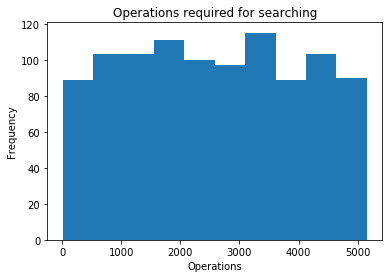

2569.0  operations required on average to find a name


In [63]:
# generate the histogram
plt.hist(seqOps)
plt.title("Operations required for searching")
plt.xlabel("Operations")
plt.ylabel("Frequency")

# Show the histogram
plt.show()

# Calculate the mean number of operaiohs required
seqMeanOps = round(np.mean(seqOps))
print(seqMeanOps, " operations required on average to find a name")

Draw a histogram of the time taken to find names

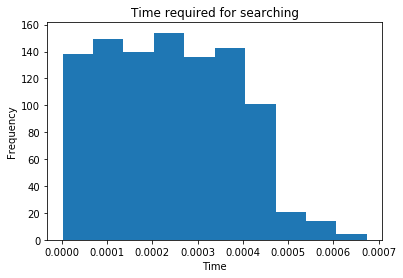

0.0002391829490661621  time required on average to find a name


In [64]:
# generate the histogram
plt.hist(seqTimes)
plt.title("Time required for searching")
plt.xlabel("Time")
plt.ylabel("Frequency")

# Show the histogram
plt.show()

# Calculate the mean number of operaiohs required
seqMeanTime = np.mean(seqTimes)
print(seqMeanTime, " time required on average to find a name")

## Binary Search

A function to perform a binary search on te list of names

In [65]:
# A function that performs a simple binary search through a list of names
# Returnes -1 if name not found
def binarySearch(names, target):
    
    # intialise counters
    targetIndex = -1
    operationCount = 0
    namePercentage = 0
    
    # Names are stored in upper case in our list so convert the target
    target = target.upper()
    
    low = 0
    high = len(names)
    
    item_index = -1
    finished = False
    
    # Continue until the target item is found
    while(not finished):
        
        operationCount += 1   # Count that we have performed an operation
            
        # Calcualte the split point (midway between lower and upper bound)
        split = math.floor((low + high)/2)
        
        # If we find the name store the index, record the percentage for that name, 
        # and break out of the loop
        if(names[split]["name"] == target):
            item_index = split
            namePercentage = names[split]["percentage"]
            finished = True
        
        # if the target name is greater than the name at the split point look at the upper half of the current list
        elif(names[split]["name"] > target):
            high = split - 1
       
        # if the target name is less than the name at the split point look at the lower half of the current list
        else:
            low = split + 1
            
                # If we have converged then the name isn't in the list
        if(low > high):
            finished = True
            
    # Return the index, percentage, and number of operations performed
    return {"index":item_index, "percentage":namePercentage, "ops":operationCount}

Test our binary search function

In [66]:
binarySearch(names, "Bill")

{'index': 489, 'percentage': 0.057, 'ops': 11}

In [67]:
binarySearch(names, "Mary")

{'index': 3362, 'percentage': 1.319, 'ops': 12}

In [72]:
binarySearch(names, "Zach")

{'index': -1, 'percentage': 0, 'ops': 13}

Test out our binary search by searching for 1000 random names from the list and seeing how many operations are required

In [70]:
binaryOps = list()
binaryTimes = list()

# Perform 1000 searches for random names
for i in range(1000):

    # Select a random name
    randomName = random.choice(names)
    
    # Search for the random name
    
    tic = time.time()
    res = binarySearch(names, randomName["name"])
    toc = time.time()
    
    # Record the number of opoerations required to find the random name
    binaryOps.append(res["ops"])
    
    # Record the time required to find the random name
    binaryTimes.append(toc - tic)

Draw a histogam of the number of operations taken to find names

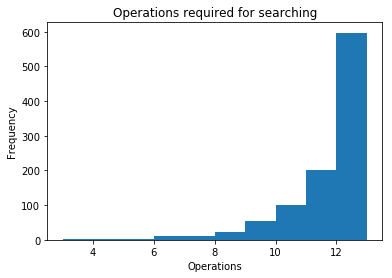

11.0  operations required on average to find a name


In [71]:
  # generate the histogram
plt.hist(binaryOps)
plt.title("Operations required for searching")
plt.xlabel("Operations")
plt.ylabel("Frequency")

# Show the histogram
plt.show()

# Calculate the mean number of operaiohs required
meanBinaryOps = round(np.mean(binaryOps))
print(meanBinaryOps, " operations required on average to find a name")

Draw a histogram of the time taken to find names

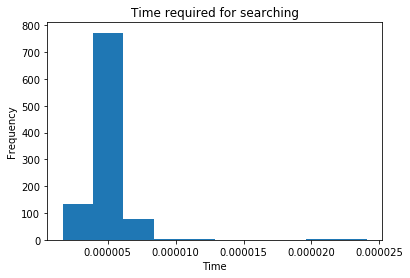

4.989862442016601e-06  time required on average to find a name


In [73]:
# generate the histogram
plt.hist(binaryTimes)
plt.title("Time required for searching")
plt.xlabel("Time")
plt.ylabel("Frequency")

# Show the histogram
plt.show()

# Calculate the mean number of operaiohs required
binaryMeanTime = np.mean(binaryTimes)
print(binaryMeanTime, " time required on average to find a name")

## Hash Table

Write a function that creates a hash table where the number of first letter of a name is used as the hash

In [74]:
# A function to generate a hash table
def generateHashTable(names):
    
    # Generate the has list - one empty list per letter in the aplhabet
    hashTable = list()
    for i in range(0,26):
        hashTable.append({"key":i, "list":list()})
    
    # Iterate through the names adding each to the hash table
    for n in names:
        
        # Isolate the first letter from the name
        letter = n["name"][0].upper()
    
        # Find the list in the hash table for the first letter
        letterListIndex =  ord(letter)-ord("A")
        
        # Add the element to the list
        hashTable[letterListIndex]["list"].append(n)
   
    return hashTable

Generate the hash table from the names list

In [75]:
hashTable = generateHashTable(names)

In [76]:
hashTable

[{'key': 0,
  'list': [{'name': 'AARON', 'percentage': 0.121},
   {'name': 'ABBEY', 'percentage': 0.002},
   {'name': 'ABBIE', 'percentage': 0.005},
   {'name': 'ABBY', 'percentage': 0.009},
   {'name': 'ABDUL', 'percentage': 0.004},
   {'name': 'ABE', 'percentage': 0.004},
   {'name': 'ABEL', 'percentage': 0.01},
   {'name': 'ABIGAIL', 'percentage': 0.013},
   {'name': 'ABRAHAM', 'percentage': 0.018},
   {'name': 'ABRAM', 'percentage': 0.003},
   {'name': 'ADA', 'percentage': 0.029},
   {'name': 'ADAH', 'percentage': 0.001},
   {'name': 'ADALBERTO', 'percentage': 0.003},
   {'name': 'ADALINE', 'percentage': 0.001},
   {'name': 'ADAM', 'percentage': 0.131},
   {'name': 'ADAN', 'percentage': 0.005},
   {'name': 'ADDIE', 'percentage': 0.013},
   {'name': 'ADELA', 'percentage': 0.007},
   {'name': 'ADELAIDA', 'percentage': 0.002},
   {'name': 'ADELAIDE', 'percentage': 0.005},
   {'name': 'ADELE', 'percentage': 0.013},
   {'name': 'ADELIA', 'percentage': 0.002},
   {'name': 'ADELINA', 'per

Write a function to search for elements wihtin a hash list - find the right list and then do a binary search within it

In [77]:
# A function that finds an element within a hash table
def findInHashTable(hashTable, target):
    
    # Isolate the first letter of the target
    targetLetter = target[0].upper()
    
    # Find the list in the hash table for the first letter
    letterListIndex =  ord(targetLetter)-ord("A")
    nameList = hashTable[letterListIndex]["list"]
    
    # Perform a binary search within the name list
    res = binarySearch(nameList, target)
    nameIndex = res["index"]
    namePercentage = res["percentage"]
    opCount = res["ops"]
    
    return {"index1":letterListIndex, "index2": nameIndex, "percentage":namePercentage, "ops":opCount}

Try out the hash table search function

In [78]:
findInHashTable(hashTable, "Bill")

{'index1': 1, 'index2': 95, 'percentage': 0.057, 'ops': 6}

In [79]:
findInHashTable(hashTable, "Mary")

{'index1': 12, 'index2': 223, 'percentage': 1.319, 'ops': 7}

In [80]:
findInHashTable(hashTable, "Zach")

{'index1': 25, 'index2': -1, 'percentage': 0, 'ops': 5}

Try  lots of random name searches

In [81]:
hashOps = list()
hashTimes = list()

# Perform 1000 searches for random names
for i in range(1000):

    # Select a random name
    randomName = random.choice(names)
    
     # Search for the random name
    tic = time.time()
    res = findInHashTable(hashTable, randomName["name"])
    toc = time.time()
    
    # Record the number of opoerations required to find the random name
    hashOps.append(res["ops"])
    
    # Record the time required to find the random name
    hashTimes.append(toc - tic)

Plot a histogram of the number of operations required for each search

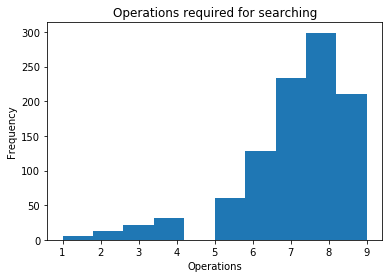

7.2  operations required on average to find a name


In [82]:
# generate the histogram
plt.hist(hashOps)
plt.title("Operations required for searching")
plt.xlabel("Operations")
plt.ylabel("Frequency")

# Show the histogram
plt.show()

# Calculate the mean number of operaiohs required
meanHashOps = np.mean(hashOps)
print(meanHashOps, " operations required on average to find a name")

Draw a histogram of the time taken to find names

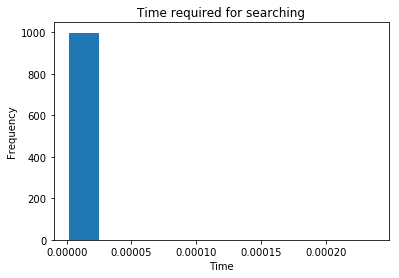

5.618333816528321e-06  time required on average to find a name


In [83]:
# generate the histogram
plt.hist(hashTimes)
plt.title("Time required for searching")
plt.xlabel("Time")
plt.ylabel("Frequency")

# Show the histogram
plt.show()

# Calculate the mean number of operaiohs required
hashMeanTime = np.mean(hashTimes)
print(hashMeanTime, " time required on average to find a name")

## Compare Different Search Times

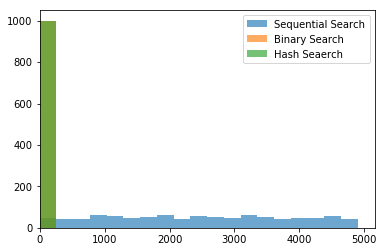

In [84]:
plt.figure()
# Set up some properties to make a nice looking histogram
xlim = (0, max(seqOps + binaryOps + hashOps))
bins = np.arange(xlim[0], xlim[1], (xlim[1] - xlim[0])/20) # fixed bin size
plt.xlim(xlim)

# Draw the histogram bars for the bubble sort and insert sort times
_ = plt.hist(seqOps, bins = bins, label = "Sequential Search", alpha = 0.65)
_ = plt.hist(binaryOps, bins = bins, label = "Binary Search", alpha = 0.65)
_ = plt.hist(hashOps, bins = bins, label = "Hash Seaerch", alpha = 0.65)

# Add a legend
plt.legend()
plt.show()

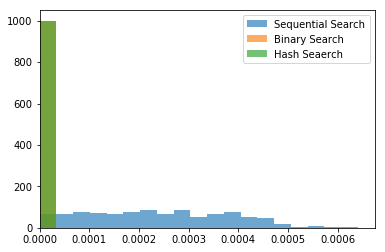

In [85]:
plt.figure()
# Set up some properties to make a nice looking histogram
xlim = (0, max(seqTimes + binaryTimes + hashTimes))
bins = np.arange(xlim[0], xlim[1], (xlim[1] - xlim[0])/20) # fixed bin size
plt.xlim(xlim)

# Draw the histogram bars for the bubble sort and insert sort times
_ = plt.hist(seqTimes, bins = bins, label = "Sequential Search", alpha = 0.65)
_ = plt.hist(binaryTimes, bins = bins, label = "Binary Search", alpha = 0.65)
_ = plt.hist(hashTimes, bins = bins, label = "Hash Seaerch", alpha = 0.65)

# Add a legend
plt.legend()
plt.show()

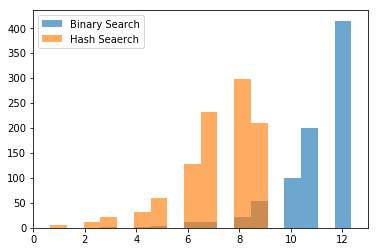

In [86]:
plt.figure()
# Set up some properties to make a nice looking histogram
xlim = (0, max(binaryOps + hashOps))
bins = np.arange(xlim[0], xlim[1], (xlim[1] - xlim[0])/20) # fixed bin size
plt.xlim(xlim)

# Draw the histogram bars for the bubble sort and insert sort times
_ = plt.hist(binaryOps, bins = bins, label = "Binary Search", alpha = 0.65)
_ = plt.hist(hashOps, bins = bins, label = "Hash Seaerch", alpha = 0.65)

# Add a legend
plt.legend()
plt.show()

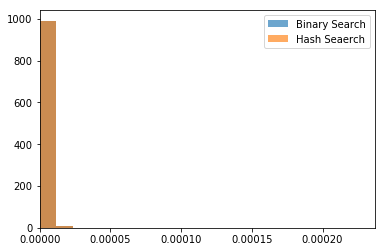

In [87]:
plt.figure()
# Set up some properties to make a nice looking histogram
xlim = (0, max(binaryTimes + hashTimes))
bins = np.arange(xlim[0], xlim[1], (xlim[1] - xlim[0])/20) # fixed bin size
plt.xlim(xlim)

# Draw the histogram bars for the bubble sort and insert sort times
_ = plt.hist(binaryTimes, bins = bins, label = "Binary Search", alpha = 0.65)
_ = plt.hist(hashTimes, bins = bins, label = "Hash Seaerch", alpha = 0.65)

# Add a legend
plt.legend()
plt.show()